# MACHINE LEARNING

## Introducing Scikit-Learn

### Data Representation in scikit-learn

### Data as table

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Target-array

/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


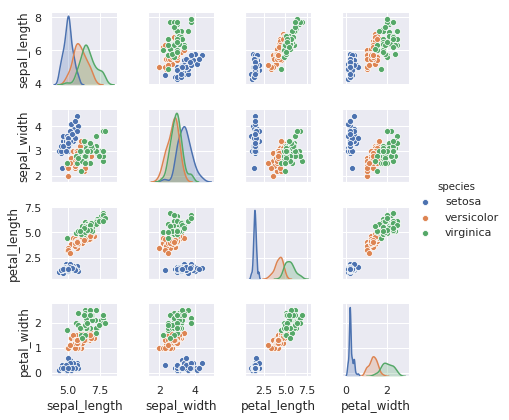

In [2]:
%matplotlib inline
sns.set()
sns.pairplot(iris, hue = 'species', size = 1.5)

In [3]:
X_iris = iris.drop('species', axis = 1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

### Scikit-Learn Estimator API

### Basics of API
#### 1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
#### 2. Choose model hyperparameters by instantiating this class with desired values.
#### 3. Arrange data into a features matrix and target vector following the discussion above.
#### 4. Fit the model to your data by calling the fit() method of the model instance.
#### 5 . Apply the Model to new data:
        ##### For supervised learning, often we predict labels for unknown data using the predict() method.
        ##### For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

### Supervised learning example: Simple linear regression

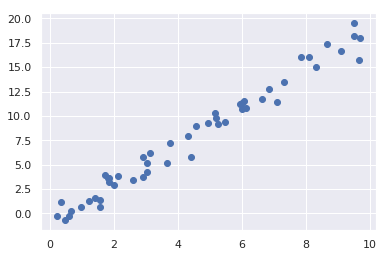

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10*rng.rand(50)
y = 2*x  - 1 + rng.randn(50)
plt.scatter(x,y);

In [6]:
## Choose class of model
from sklearn.linear_model import LinearRegression

In [7]:
## Choose model hyperparameters
model = LinearRegression(fit_intercept = True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
## Arrange data into features matrix and target vector
X = x[:, np.newaxis]
X.shape

(50, 1)

In [9]:
## Fit model to your data
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
model.coef_ ## for obtaining the slope

array([1.9776566])

In [11]:
model.intercept_ ## for obtaining the y-intercept

-0.9033107255311164

In [12]:
## Predict labels for unknown data
xfit = np.linspace(-1,11)

In [13]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

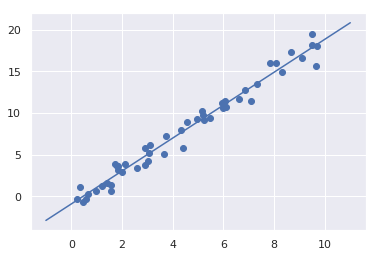

In [14]:
plt.scatter(x,y)
plt.plot(xfit, yfit)

### Supervised learning example: Iris classification

In [15]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state = 1)

In [16]:
from sklearn.naive_bayes import GaussianNB ## choosing model class
model = GaussianNB()                       ## choose model hyperparameters
model.fit(Xtrain, ytrain)                  ## Fit the model to data
y_model = model.predict(Xtest)             ## predict new data

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_model, ytest)

0.9736842105263158

### Unsupervised learning: Iris dimensionality

In [18]:
from sklearn.decomposition import PCA ## choosing model class
model = PCA(n_components = 2) ## choosing model hyperparameters
model.fit(X_iris)           ## fit the model to data
X_2D = model.transform(X_iris)   ## transform new data

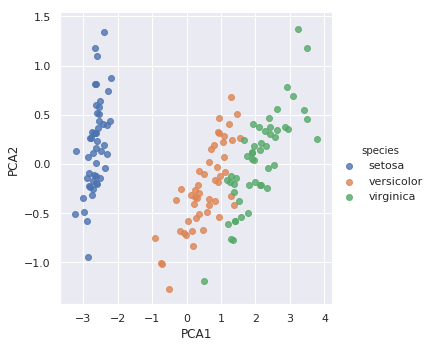

In [19]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
sns.lmplot("PCA1","PCA2", hue = 'species', data = iris, fit_reg = False)

### Unsupervised learning: Iris clustering

In [20]:
from sklearn.mixture import GaussianMixture     # 1. Choose the model class
model = GaussianMixture(n_components=3, covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

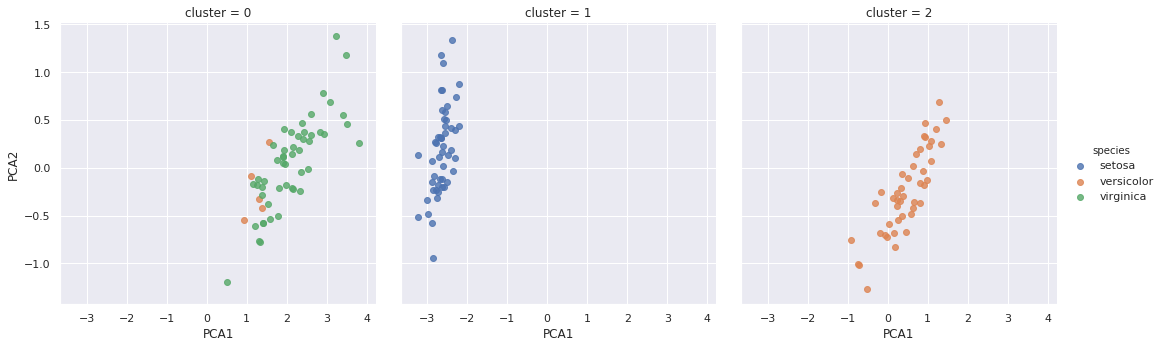

In [21]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

### Application: Exploring Handwritten digits

#### Loading and visualizing the digits

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

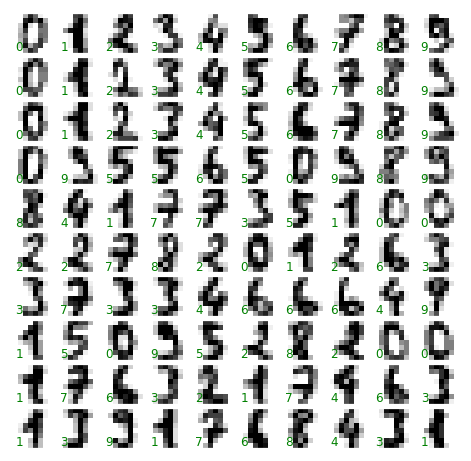

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [24]:
X = digits.data
X.shape

(1797, 64)

In [25]:
y = digits.target
y.shape

(1797,)

### Unsupervised learning: Dimensionality reduction

In [26]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

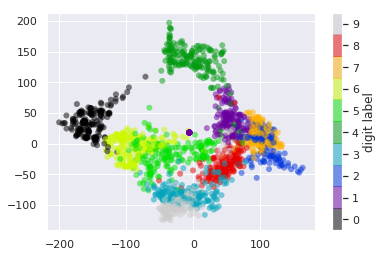

In [27]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

### Classification on digits

In [28]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0)

In [29]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

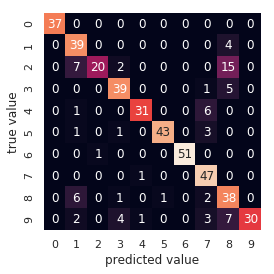

In [31]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

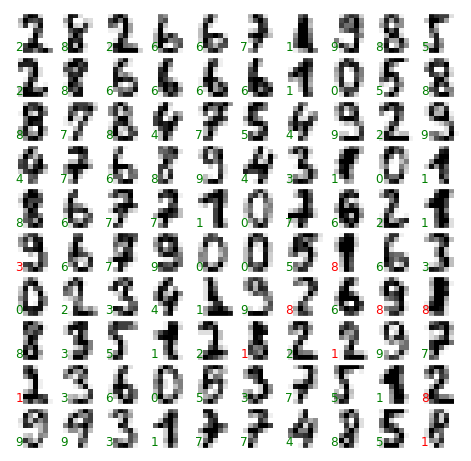

In [32]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')